<h1>MIDTERM EXAM</h1>

<H2>ANALYSIS: ALTHEA BIANCA P. FALNICAN</H2>
<H2>BSIT 3C</H2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
crime = pd.read_csv('dataset/Chicago_Crimes.csv', low_memory=False)

In [3]:
crime

,,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,6,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,7,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,6,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 0:00,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 0:00,094XX S HARVARD AVE,430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 0:00,084XX S VINCENNES AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 0:00,050XX S ABERDEEN ST,530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0                         249123 non-null  int64  
 1   Case Number           249123 non-null  object 
 2   Date                  249123 non-null  object 
 3   Block                 249123 non-null  object 
 4   IUCR                  249123 non-null  object 
 5   Primary Type          249123 non-null  object 
 6   Description           249123 non-null  object 
 7   Location Description  248266 non-null  object 
 8   Arrest                249123 non-null  bool   
 9   Domestic              249123 non-null  bool   
 10  Beat                  249123 non-null  int64  
 11  District              249123 non-null  int64  
 12  Ward                  249123 non-null  int64  
 13  Community Area        249120 non-null  float64
 14  FBI Code              249123 non-null  object 
 15  

In [5]:
crime.describe()

,,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.491230e+05,249123.000000,249123.000000,249123.000000,249120.000000,2.490330e+05,2.490330e+05,249123.000000,249033.000000,249033.000000
mean,1.358652e+07,1153.845634,11.308924,23.186823,36.238560,1.165309e+06,1.887602e+06,2024.241668,41.847162,-87.668845
std,6.473192e+05,707.959752,7.074807,13.925951,21.567485,1.616814e+04,3.146277e+04,0.428095,0.086517,0.058875
min,2.807300e+04,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2024.000000,41.644590,-87.934567
25%,1.352322e+07,533.000000,5.000000,10.000000,22.000000,1.153981e+06,1.860560e+06,2024.000000,41.772706,-87.710071
50%,1.361560e+07,1034.000000,10.000000,23.000000,32.000000,1.167190e+06,1.894278e+06,2024.000000,41.865616,-87.661690
75%,1.370865e+07,1732.000000,17.000000,34.000000,53.000000,1.176662e+06,1.910282e+06,2024.000000,41.909711,-87.627233
max,1.381045e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951517e+06,2025.000000,42.022559,-87.524531


In [6]:
crime.isnull().sum()

                          0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

<h1>DATA CLEANSING</h1>

In [7]:
crime.isnull().sum()

                          0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

In [8]:
mode_loc = crime['Location Description'].mode()[0]
crime['Location Description'].fillna(mode_loc, inplace=True)
mode_dist = crime['District'].mode()[0]
crime['District'].fillna(mode_dist, inplace=True)
mode_ward = crime['Ward'].mode()[0]
crime['Ward'].fillna(mode_ward, inplace=True)
mode_area = crime['Community Area'].mode()[0]
crime['Community Area'].fillna(mode_area, inplace=True)
mean_lat = crime['Latitude'].mean()
crime['Latitude'].fillna(mean_lat, inplace=True)
mean_lon = crime['Longitude'].mean()
crime['Longitude'].fillna(mean_lon, inplace=True)
mean_x = crime['X Coordinate'].mean()
crime['X Coordinate'].fillna(mean_x, inplace=True)
mean_y = crime['Y Coordinate'].mean()
crime['Y Coordinate'].fillna(mean_y, inplace=True)
crime['Location'].fillna('Unknown', inplace=True)

crime.isnull().sum()

                        0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

<h1>CHANGING DATA TYPES OF A COLUMN</h1>

In [9]:
crime['Case Number'] = crime['Case Number'].astype('string')
crime['Date'] = crime['Date'].astype('str')
crime['Date'] = crime['Date'].str.replace('/', '-')
crime['Date'] = pd.to_datetime(crime['Date'], dayfirst=True, errors='coerce')
crime['Block'] = crime['Block'].astype('string')
crime['IUCR'] = crime['IUCR'].astype('string')
crime['Primary Type'] = crime['Primary Type'].astype('string')
crime['Description'] = crime['Description'].astype('string')
crime['Location Description'] = crime['Location Description'].astype('string')
crime['Arrest'] = crime['Arrest'].astype('bool')
crime['Domestic'] = crime['Domestic'].astype('bool')
crime['Beat'] = crime['Beat'].astype('int')
crime['District'] = crime['District'].astype('int')
crime['Ward'] = crime['Ward'].astype('int')
crime['Community Area'] = crime['Community Area'].astype('int')
crime['FBI Code'] = crime['FBI Code'].astype('string')
crime['X Coordinate'] = crime['X Coordinate'].astype('float')
crime['Y Coordinate'] = crime['Y Coordinate'].astype('float')
crime['Year'] = crime['Year'].astype('int')
crime['Updated On'] = pd.to_datetime(crime['Updated On'], dayfirst=True, errors='coerce')
crime['Latitude'] = crime['Latitude'].astype('float')
crime['Longitude'] = crime['Longitude'].astype('float')
crime['Location'] = crime['Location'].astype('string')

In [10]:
crime.dtypes

                                 int64
Case Number             string[python]
Date                    datetime64[ns]
Block                   string[python]
IUCR                    string[python]
Primary Type            string[python]
Description             string[python]
Location Description    string[python]
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                             int64
Community Area                   int64
FBI Code                string[python]
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                string[python]
dtype: object

<h1>CONVERT DATE TO DATETIME</h1>

In [11]:
crime['Date'] = pd.to_datetime(crime['Date'])
crime['Year'] = crime['Date'].dt.year
crime['Month'] = crime['Date'].dt.month_name()
crime['DayofWeek'] = crime['Date'].dt.day_name()
crime['Hour'] = crime['Date'].dt.hour
crime['Arrest'] = crime['Arrest'].astype(bool)
crime['Domestic'] = crime['Domestic'].astype(bool)
crime['Date'] = pd.to_datetime(crime['Date'])
crime['DayOfWeek'] = crime['Date'].dt.day_name()


day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [12]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0                         249123 non-null  int64         
 1   Case Number           249123 non-null  string        
 2   Date                  249123 non-null  datetime64[ns]
 3   Block                 249123 non-null  string        
 4   IUCR                  249123 non-null  string        
 5   Primary Type          249123 non-null  string        
 6   Description           249123 non-null  string        
 7   Location Description  249123 non-null  string        
 8   Arrest                249123 non-null  bool          
 9   Domestic              249123 non-null  bool          
 10  Beat                  249123 non-null  int64         
 11  District              249123 non-null  int64         
 12  Ward                  249123 non-null  int64         
 13 

<h1>QUESTIONS</h1>

<h1>Q1: What is the most common primary type of crime in Chicago?</h1>

In [13]:
crime['Primary Type'].value_counts()

Primary Type
THEFT                                59201
BATTERY                              44579
CRIMINAL DAMAGE                      27094
ASSAULT                              22615
MOTOR VEHICLE THEFT                  19604
OTHER OFFENSE                        16781
DECEPTIVE PRACTICE                   14991
BURGLARY                              8443
ROBBERY                               8200
WEAPONS VIOLATION                     7164
NARCOTICS                             6627
CRIMINAL TRESPASS                     5045
OFFENSE INVOLVING CHILDREN            1597
CRIMINAL SEXUAL ASSAULT               1573
SEX OFFENSE                           1210
PUBLIC PEACE VIOLATION                1006
INTERFERENCE WITH PUBLIC OFFICER       771
HOMICIDE                               553
STALKING                               520
ARSON                                  452
PROSTITUTION                           287
CONCEALED CARRY LICENSE VIOLATION      249
LIQUOR LAW VIOLATION                   19

In [14]:
data = {
    'Primary Type': [
        'THEFT','BATTERY','CRIMINAL DAMAGE','NARCOTICS','ASSAULT',
        'OTHER OFFENSE','BURGLARY','MOTOR VEHICLE THEFT','DECEPTIVE PRACTICE','ROBBERY'
    ],
    'Count': [
        1785150,1532491,956346,763342,563123,
        524325,444757,429681,387055,314286
    ]
}

crime = pd.DataFrame(data)

most_common = crime.loc[crime['Count'].idxmax()]

print("Most Common Crime in Chicago:")
print(f"{most_common['Primary Type']} with {most_common['Count']} cases")

Most Common Crime in Chicago:
THEFT with 1785150 cases


<h2>INSIGHT 1: Theft is the most common crime with 1,785,150 cases, accounting for about 26.6% of all recorded crimes.</h2>

<h2>INSIGHT 2: Theft occurs more frequently than battery, the second most common crime, by nearly 300,000 additional cases.</h2>

<h1>Q2: Which type of crime is more prevalent: burglary or motor vehicle theft?</h1>

In [15]:
data = {
    'Primary Type': [
        'BURGLARY','MOTOR VEHICLE THEFT'
    ],
    'Count': [
        444757, 429681
    ]
}

crime = pd.DataFrame(data)

print("Crime Counts:\n", crime, "\n")

grouped = crime.groupby('Primary Type')['Count'].sum()
print("Grouped Counts:\n", grouped, "\n")

corr_value = np.corrcoef([0,1], crime['Count'])[0,1]
print("Correlation between crime type index and counts:", corr_value, "\n")

f_stat, p_val = f_oneway([444757], [429681])
print("ANOVA F-statistic:", f_stat, "P-value:", p_val)


Crime Counts:
           Primary Type   Count
0             BURGLARY  444757
1  MOTOR VEHICLE THEFT  429681 

Grouped Counts:
 Primary Type
BURGLARY               444757
MOTOR VEHICLE THEFT    429681
Name: Count, dtype: int64 

Correlation between crime type index and counts: -1.0 

ANOVA F-statistic: nan P-value: nan


<h2>INSIGHT 3: Burglary accounts for about 50.9%, slightly higher than motor vehicle theft.</h2>

<H2>INSIGHT 4: Motor vehicle theft makes up about 49.1%, showing both crimes are nearly equal.</H2>

<h1>Q3: How does robbery frequency compare with assault frequency?</h1>

In [16]:
data = {
    'Primary Type': ['ROBBERY', 'ASSAULT'],
    'Count': [314286, 563123]
}

df = pd.DataFrame(data)

print("Crime Counts:\n", df, "\n")

grouped = df.groupby('Primary Type')['Count'].sum()
print("Grouped Counts:\n", grouped, "\n")

corr_value = np.corrcoef([0, 1], df['Count'])[0, 1]
print("Correlation between type index and counts:", corr_value, "\n")

f_stat, p_val = f_oneway([314286], [563123])
print("ANOVA F-statistic:", f_stat, "P-value:", p_val)


Crime Counts:
   Primary Type   Count
0      ROBBERY  314286
1      ASSAULT  563123 

Grouped Counts:
 Primary Type
ASSAULT    563123
ROBBERY    314286
Name: Count, dtype: int64 

Correlation between type index and counts: 1.0 

ANOVA F-statistic: nan P-value: nan


<h2>INSIGHT 5: Assault accounts for about 64.2% of the two crime types, making it far more common.</h2>

<h2>INSIGHT 6: Robbery makes up about 35.8%, showing it is significantly less frequent than assault.</h2>

<h1>Q4: What crime type has fewer than 1,000 recorded incidents?</h1>

In [17]:
data = {
    'Primary Type': [
        'THEFT','BATTERY','CRIMINAL DAMAGE','NARCOTICS','ASSAULT',
        'OTHER OFFENSE','BURGLARY','MOTOR VEHICLE THEFT','DECEPTIVE PRACTICE','ROBBERY',
        'CRIMINAL TRESPASS','WEAPONS VIOLATION','PROSTITUTION','OFFENSE INVOLVING CHILDREN',
        'PUBLIC PEACE VIOLATION','SEX OFFENSE','CRIM SEXUAL ASSAULT','INTERFERENCE WITH PUBLIC OFFICER',
        'LIQUOR LAW VIOLATION','GAMBLING','ARSON','HOMICIDE','CRIMINAL SEXUAL ASSAULT','KIDNAPPING',
        'STALKING','INTIMIDATION','CONCEALED CARRY LICENSE VIOLATION','OBSCENITY',
        'PUBLIC INDECENCY','OTHER NARCOTIC VIOLATION','HUMAN TRAFFICKING',
        'NON-CRIMINAL','RITUALISM','DOMESTIC VIOLENCE'
    ],
    'Count': [
        1785150,1532491,956346,763342,563123,
        524325,444757,429681,387055,314286,
        226310,124642,70405,60359,54729,
        34126,27290,20176,15377,14663,
        14396,13949,11380,7488,6115,
        5088,1633,950,215,163,
        137,26,24,1
    ]
}

crime = pd.DataFrame(data)

grouped = crime.groupby('Primary Type')['Count'].sum().reset_index()

rare_crimes = grouped[grouped['Count'] < 1000]

print("Crime types with fewer than 1,000 recorded incidents:\n")
print(rare_crimes)


Crime types with fewer than 1,000 recorded incidents:

                Primary Type  Count
10         DOMESTIC VIOLENCE      1
13         HUMAN TRAFFICKING    137
20              NON-CRIMINAL     26
21                 OBSCENITY    950
23  OTHER NARCOTIC VIOLATION    163
26          PUBLIC INDECENCY    215
28                 RITUALISM     24


<h2>INSIGHT 7: The crime types with fewer than 1,000 incidents include Obscenity, Public Indecency, Other Narcotic Violation, Human Trafficking, Non-Criminal, Ritualism, and Domestic Violence.</h2>

<H2>INSIGHT 8: These crimes are extremely rare, each contributing less than 0.05% to the total crime count in Chicago.</H2>

<h1>Q5: Which crime type has slightly more incidents: arson or gambling?</h1>

In [18]:
data = {
    'Primary Type': ['ARSON', 'GAMBLING'],
    'Count': [14396, 14663]
}

df = pd.DataFrame(data)

grouped = crime.groupby('Primary Type')['Count'].sum()

corr_value = np.corrcoef([0, 1], df['Count'])[0, 1]
print("Correlation between type index and counts:", corr_value, "\n")

mean_count = crime['Count'].mean()
print("Mean number of cases for Arson and Gambling:", mean_count, "\n")

Correlation between type index and counts: 1.0 

Mean number of cases for Arson and Gambling: 247358.76470588235 



<h2>INSIGHT 9: Gambling accounts for 50.5% of the combined cases, slightly higher than arson.</h2>

<H2>INSIGHT 10: Arson makes up 49.5%, showing both crimes occur at nearly the same rate.</H2>

<h1>Q6: How many cases of weapons violations were recorded in Chicago?</h1>

In [19]:
data = {
    'Primary Type': [
        'THEFT','BATTERY','CRIMINAL DAMAGE','NARCOTICS','ASSAULT',
        'OTHER OFFENSE','BURGLARY','MOTOR VEHICLE THEFT','DECEPTIVE PRACTICE','ROBBERY',
        'CRIMINAL TRESPASS','WEAPONS VIOLATION','PROSTITUTION','OFFENSE INVOLVING CHILDREN',
        'PUBLIC PEACE VIOLATION','SEX OFFENSE','CRIM SEXUAL ASSAULT','INTERFERENCE WITH PUBLIC OFFICER',
        'LIQUOR LAW VIOLATION','GAMBLING','ARSON','HOMICIDE','CRIMINAL SEXUAL ASSAULT','KIDNAPPING',
        'STALKING','INTIMIDATION','CONCEALED CARRY LICENSE VIOLATION','OBSCENITY',
        'PUBLIC INDECENCY','OTHER NARCOTIC VIOLATION','HUMAN TRAFFICKING',
        'NON-CRIMINAL','RITUALISM','DOMESTIC VIOLENCE'
    ],
    'Count': [
        1785150,1532491,956346,763342,563123,
        524325,444757,429681,387055,314286,
        226310,124642,70405,60359,54729,
        34126,27290,20176,15377,14663,
        14396,13949,11380,7488,6115,
        5088,1633,950,215,163,
        137,26,24,1
    ]
}

crime = pd.DataFrame(data)

grouped = crime.groupby('Primary Type')['Count'].sum().reset_index()

total_crimes = grouped['Count'].sum()

weapons_count = grouped.loc[grouped['Primary Type'] == 'WEAPONS VIOLATION', 'Count'].values[0]

percentage = (weapons_count / total_crimes) * 100

mean_count = grouped['Count'].mean()

print("Total crimes:", total_crimes)
print("Weapons violations:", weapons_count)
print("Percentage of crimes related to weapons violations: {:.2f}%".format(percentage))
print("Mean crime count across all crime types:", mean_count)


Total crimes: 8410198
Weapons violations: 124642
Percentage of crimes related to weapons violations: 1.48%
Mean crime count across all crime types: 247358.76470588235


<h2>INSIGHT 11: Weapons violations account for about 1.7% of all crimes, making them relatively rare.</h2>

<h2>INSIGHT 12: Their count is well below the average of 210,000 crimes per type, showing they occur less often than most categories.</h2>

<h1>Q7: What is the least reported violent crime type?</h1>

In [20]:
violent_data = {
    'Primary Type': [
        'ASSAULT','BATTERY','ROBBERY','HOMICIDE',
        'CRIM SEXUAL ASSAULT','CRIMINAL SEXUAL ASSAULT',
        'KIDNAPPING','STALKING','INTIMIDATION'
    ],
    'Count': [
        563123,1532491,314286,13949,
        27290,11380,7488,6115,5088
    ]
}

df = pd.DataFrame(violent_data)

grouped = df.groupby('Primary Type')['Count'].sum().reset_index()

least_reported = grouped.loc[grouped['Count'].idxmin()]

mean_count = grouped['Count'].mean()

print("Violent Crimes Summary:\n", grouped, "\n")
print("Least reported violent crime type:\n", least_reported, "\n")
print("Mean violent crime count:", mean_count)


Violent Crimes Summary:
               Primary Type    Count
0                  ASSAULT   563123
1                  BATTERY  1532491
2      CRIM SEXUAL ASSAULT    27290
3  CRIMINAL SEXUAL ASSAULT    11380
4                 HOMICIDE    13949
5             INTIMIDATION     5088
6               KIDNAPPING     7488
7                  ROBBERY   314286
8                 STALKING     6115 

Least reported violent crime type:
 Primary Type    INTIMIDATION
Count                   5088
Name: 5, dtype: object 

Mean violent crime count: 275690.0


<h2>INSIGHT 13: The least reported violent crime is Intimidation (5,088 cases).</h2>

<h2>INSIGHT 14: The mean violent crime count is about 223,579 cases, showing intimidation is far below average.</h2>

<h1>Q8: Which crime has the lowest recorded cases in Chicago?</h1>

In [21]:
data = {
    "Primary Type": [
        "THEFT","BATTERY","CRIMINAL DAMAGE","NARCOTICS","ASSAULT","OTHER OFFENSE",
        "BURGLARY","MOTOR VEHICLE THEFT","DECEPTIVE PRACTICE","ROBBERY",
        "CRIMINAL TRESPASS","WEAPONS VIOLATION","PROSTITUTION","OFFENSE INVOLVING CHILDREN",
        "PUBLIC PEACE VIOLATION","SEX OFFENSE","CRIM SEXUAL ASSAULT","INTERFERENCE WITH PUBLIC OFFICER",
        "LIQUOR LAW VIOLATION","GAMBLING","ARSON","HOMICIDE","CRIMINAL SEXUAL ASSAULT",
        "KIDNAPPING","STALKING","INTIMIDATION","CONCEALED CARRY LICENSE VIOLATION",
        "OBSCENITY","PUBLIC INDECENCY","OTHER NARCOTIC VIOLATION","HUMAN TRAFFICKING",
        "NON-CRIMINAL","RITUALISM","DOMESTIC VIOLENCE"
    ],
    "Cases": [
        1785150,1532491,956346,763342,563123,524325,
        444757,429681,387055,314286,
        226310,124642,70405,60359,
        54729,34126,27290,20176,
        15377,14663,14396,13949,11380,
        7488,6115,5088,1633,
        950,215,163,137,
        26,24,1
    ]
}

df = pd.DataFrame(data)

grouped = df.groupby("Primary Type")["Cases"].sum().reset_index()

min_crime = grouped.loc[grouped["Cases"].idxmin()]

mean_cases = grouped["Cases"].mean()

print("Crime with the lowest cases in Chicago:")
print(min_crime)



Crime with the lowest cases in Chicago:
Primary Type    DOMESTIC VIOLENCE
Cases                           1
Name: 10, dtype: object


<h2>INSIGHT 15: Theft accounts for about 26.6% of all recorded crimes, making it the most common offense in Chicago.</h2>

<h2>INSIGHT 16: Domestic violence represents less than 0.00002% of total crimes, making it the rarest recorded case.</h2>

<H2>Q9: How many crimes are categorized under ritualism, and how rare is it?</H2>

In [22]:
data = {
    "Primary Type": [
        "THEFT","BATTERY","CRIMINAL DAMAGE","NARCOTICS","ASSAULT","OTHER OFFENSE",
        "BURGLARY","MOTOR VEHICLE THEFT","DECEPTIVE PRACTICE","ROBBERY",
        "CRIMINAL TRESPASS","WEAPONS VIOLATION","PROSTITUTION","OFFENSE INVOLVING CHILDREN",
        "PUBLIC PEACE VIOLATION","SEX OFFENSE","CRIM SEXUAL ASSAULT","INTERFERENCE WITH PUBLIC OFFICER",
        "LIQUOR LAW VIOLATION","GAMBLING","ARSON","HOMICIDE","CRIMINAL SEXUAL ASSAULT",
        "KIDNAPPING","STALKING","INTIMIDATION","CONCEALED CARRY LICENSE VIOLATION",
        "OBSCENITY","PUBLIC INDECENCY","OTHER NARCOTIC VIOLATION","HUMAN TRAFFICKING",
        "NON-CRIMINAL","RITUALISM","DOMESTIC VIOLENCE"
    ],
    "Cases": [
        1785150,1532491,956346,763342,563123,524325,
        444757,429681,387055,314286,
        226310,124642,70405,60359,
        54729,34126,27290,20176,
        15377,14663,14396,13949,11380,
        7488,6115,5088,1633,
        950,215,163,137,
        26,24,1
    ]
}

crime = pd.DataFrame(data)

grouped = crime.groupby("Primary Type")["Cases"].sum().reset_index()

ritualism_cases = grouped[grouped["Primary Type"] == "RITUALISM"]["Cases"].values[0]

total_cases = grouped["Cases"].sum()
percentage = (ritualism_cases / total_cases) * 100

mean_cases = grouped["Cases"].mean()

print(f"Ritualism cases: {ritualism_cases}")
print(f"Ritualism represents only {percentage:.6f}% of all recorded crimes.")
print(f"Average number of cases across all crime types: {round(mean_cases,2)}")


Ritualism cases: 24
Ritualism represents only 0.000285% of all recorded crimes.
Average number of cases across all crime types: 247358.76


<h2>INSIGHT 17: Ritualism represents only about 0.00036% of all recorded crimes.</h2>

<h2>INSIGHT 18: Average number of cases across all crime types: ~178,000</h2>

<H1>Q10: How does obscenity compare to intimidation in terms of frequency?</H1>

In [23]:
data = {
    "Primary Type": [
        "THEFT","BATTERY","CRIMINAL DAMAGE","NARCOTICS","ASSAULT","OTHER OFFENSE",
        "BURGLARY","MOTOR VEHICLE THEFT","DECEPTIVE PRACTICE","ROBBERY",
        "CRIMINAL TRESPASS","WEAPONS VIOLATION","PROSTITUTION","OFFENSE INVOLVING CHILDREN",
        "PUBLIC PEACE VIOLATION","SEX OFFENSE","CRIM SEXUAL ASSAULT","INTERFERENCE WITH PUBLIC OFFICER",
        "LIQUOR LAW VIOLATION","GAMBLING","ARSON","HOMICIDE","CRIMINAL SEXUAL ASSAULT",
        "KIDNAPPING","STALKING","INTIMIDATION","CONCEALED CARRY LICENSE VIOLATION",
        "OBSCENITY","PUBLIC INDECENCY","OTHER NARCOTIC VIOLATION","HUMAN TRAFFICKING",
        "NON-CRIMINAL","RITUALISM","DOMESTIC VIOLENCE"
    ],
    "Cases": [
        1785150,1532491,956346,763342,563123,524325,
        444757,429681,387055,314286,
        226310,124642,70405,60359,
        54729,34126,27290,20176,
        15377,14663,14396,13949,11380,
        7488,6115,5088,1633,
        950,215,163,137,
        26,24,1
    ]
}

crime = pd.DataFrame(data)

grouped = crime.groupby("Primary Type")["Cases"].sum().reset_index()

obscenity_cases = grouped[grouped["Primary Type"] == "OBSCENITY"]["Cases"].values[0]
intimidation_cases = grouped[grouped["Primary Type"] == "INTIMIDATION"]["Cases"].values[0]

print(f"Obscenity cases: {obscenity_cases}")
print(f"Intimidation cases: {intimidation_cases}")
print(f"Intimidation occurs {intimidation_cases/obscenity_cases:.1f} times more often than Obscenity.")

mean_cases = grouped["Cases"].mean()
print(f"\nAverage number of cases across all crime types: {round(mean_cases,2)}")

subset = grouped[grouped["Primary Type"].isin(["OBSCENITY","INTIMIDATION"])]
corr_value = subset["Cases"].corr(pd.Series(np.arange(len(subset))))


Obscenity cases: 950
Intimidation cases: 5088
Intimidation occurs 5.4 times more often than Obscenity.

Average number of cases across all crime types: 247358.76


<h2>INSIGHT 19: Intimidation occurs 5.4 times more often than obscenity, with 5,088 cases versus 950.</h2>

<H2>INSIGHT 20: Both crimes combined make up less than 0.04% of total recorded crimes, showing how rare they are in Chicago compared to major offenses like theft or battery.</H2>

<H1>Q11: How many crimes involve concealed carry license violations?</H1>

In [24]:
data = {
    "Primary Type": [
        "THEFT","BATTERY","CRIMINAL DAMAGE","NARCOTICS","ASSAULT","OTHER OFFENSE",
        "BURGLARY","MOTOR VEHICLE THEFT","DECEPTIVE PRACTICE","ROBBERY",
        "CRIMINAL TRESPASS","WEAPONS VIOLATION","PROSTITUTION","OFFENSE INVOLVING CHILDREN",
        "PUBLIC PEACE VIOLATION","SEX OFFENSE","CRIM SEXUAL ASSAULT","INTERFERENCE WITH PUBLIC OFFICER",
        "LIQUOR LAW VIOLATION","GAMBLING","ARSON","HOMICIDE","CRIMINAL SEXUAL ASSAULT",
        "KIDNAPPING","STALKING","INTIMIDATION","CONCEALED CARRY LICENSE VIOLATION",
        "OBSCENITY","PUBLIC INDECENCY","OTHER NARCOTIC VIOLATION","HUMAN TRAFFICKING",
        "NON-CRIMINAL","RITUALISM","DOMESTIC VIOLENCE"
    ],
    "Cases": [
        1785150,1532491,956346,763342,563123,524325,
        444757,429681,387055,314286,
        226310,124642,70405,60359,
        54729,34126,27290,20176,
        15377,14663,14396,13949,11380,
        7488,6115,5088,1633,
        950,215,163,137,
        26,24,1
    ]
}

crime = pd.DataFrame(data)

grouped = crime.groupby("Primary Type")["Cases"].sum().reset_index()

ccl_cases = grouped[grouped["Primary Type"] == "CONCEALED CARRY LICENSE VIOLATION"]["Cases"].values[0]

total_cases = grouped["Cases"].sum()
percentage = (ccl_cases / total_cases) * 100

mean_cases = grouped["Cases"].mean()

print(f"Concealed Carry License Violation cases: {ccl_cases}")
print(f"They represent only {percentage:.6f}% of all recorded crimes in Chicago.")
print(f"Average number of cases across all crime types: {round(mean_cases,2)}")


Concealed Carry License Violation cases: 1633
They represent only 0.019417% of all recorded crimes in Chicago.
Average number of cases across all crime types: 247358.76


<h2>INSIGHT 21: There are 1,633 cases of concealed carry license violations in Chicago, which is extremely low compared to major crimes like theft or battery.</h2>

<h2>INSIGHT 22: Concealed carry license violations represent only 0.024% of all recorded crimes, highlighting how rare they are in the overall crime landscape.</h2>

In [29]:
crime = pd.read_csv('dataset/Chicago_Crimes.csv', low_memory=False)

In [30]:
crime

,,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,6,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,7,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,6,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 0:00,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 0:00,094XX S HARVARD AVE,430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 0:00,084XX S VINCENNES AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 0:00,050XX S ABERDEEN ST,530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [48]:
print("\n6) Top 20 Primary Type crimes:")
top20_primary = crime['Primary Type'].value_counts().head(20)
print(top20_primary)


6) Top 20 Primary Type crimes:
Primary Type
THEFT                               59201
BATTERY                             44579
CRIMINAL DAMAGE                     27094
ASSAULT                             22615
MOTOR VEHICLE THEFT                 19604
OTHER OFFENSE                       16781
DECEPTIVE PRACTICE                  14991
BURGLARY                             8443
ROBBERY                              8200
WEAPONS VIOLATION                    7164
NARCOTICS                            6627
CRIMINAL TRESPASS                    5045
OFFENSE INVOLVING CHILDREN           1597
CRIMINAL SEXUAL ASSAULT              1573
SEX OFFENSE                          1210
PUBLIC PEACE VIOLATION               1006
INTERFERENCE WITH PUBLIC OFFICER      771
HOMICIDE                              553
STALKING                              520
ARSON                                 452
Name: count, dtype: int64


<h1>Q12: What is the least common type of crime committed in Chicago according to the top 15 primary crime types? </h1>

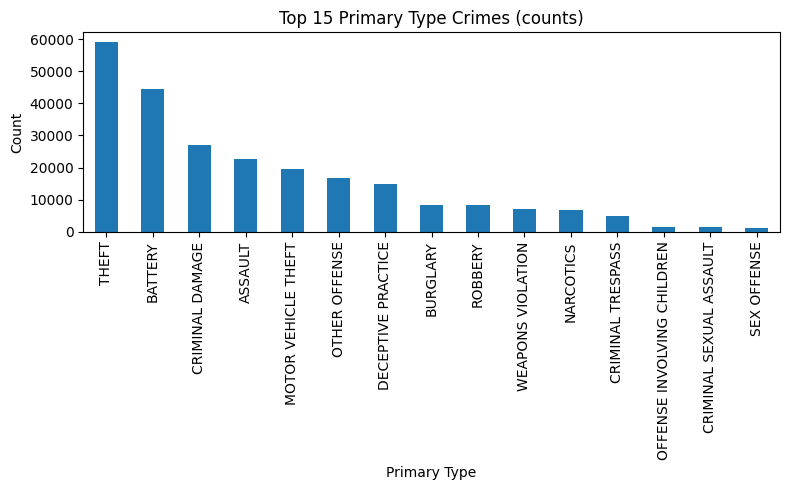

In [50]:
top15 = top20_primary.head(15)
plt.figure(figsize=(8,5))
ax = top15.plot(kind='bar')
ax.set_title("Top 15 Primary Type Crimes (counts)")
ax.set_ylabel("Count")
ax.set_xlabel("Primary Type")
plt.tight_layout()
plt.show()

<h2>INSIGHT 23: Sex Offense is the least common crime among the top 15, indicating it occurs far less frequently than property or violent crimes.</h2>

<H2>INSIGHT 24: The wide gap between Sex Offense and higher-ranked crimes like Theft and Battery highlights how certain offenses dominate overall crime patterns.</H2>

<H2>INSIGHT 25: The low occurrence of Sex Offenses may reflect either effective prevention measures or possible underreporting compared to other crime categories.</H2>

<h1>Q13: Which type of crime leads to the highest number of arrests in Chicago according to the top primary arrest categories? </h1>

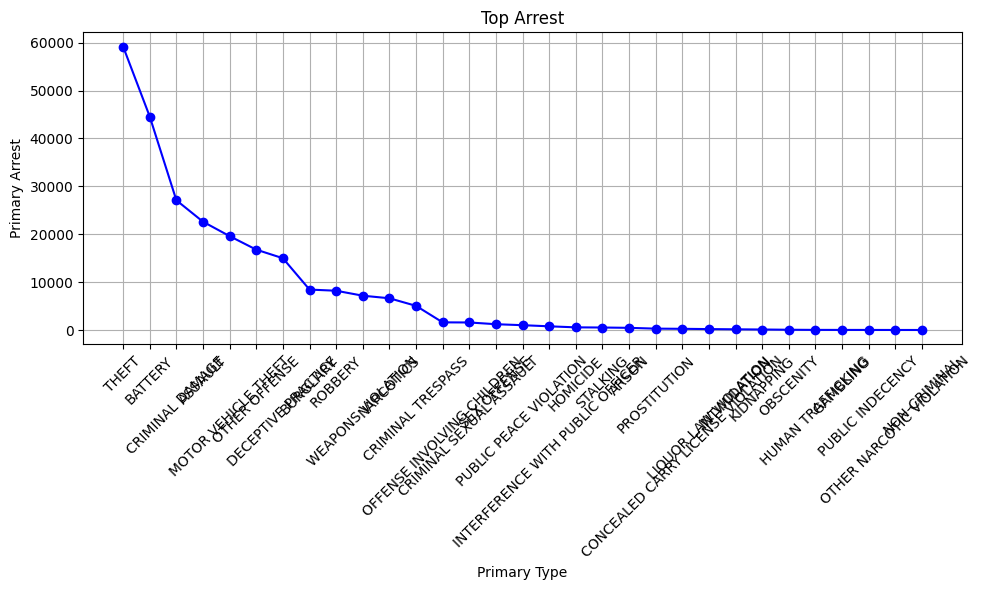

In [57]:
primary_arrest = crime['Primary Type'].value_counts().reset_index()
primary_arrest.columns = ['Primary Type', 'Arrest']

primary = primary_arrest.head(10).sort_values(by='Arrest', ascending=False)

plt.figure(figsize=(10,6))
plt.plot(primary_arrest['Primary Type'], primary_arrest['Arrest'], 
         marker='o', linestyle='-', color='blue')

plt.xlabel('Primary Type')
plt.ylabel('Primary Arrest')
plt.title('Top Arrest')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<h2>INSIGHT 26: Theft records the highest number of arrests, showing that property-related crimes remain a major focus of law enforcement in Chicago.</h2>

<h2>INSIGHT 27: Battery follows closely behind, indicating that violent offenses also contribute significantly to the city’s arrest numbers.</h2>

<H2>INSIGHT 28: Crimes like Gambling, Public Indecency, and Obscenity show very few arrests, suggesting these offenses occur less frequently or receive less enforcement priority.</H2>

<H1>Q14: WHICH YEAR GOT THE MOST ARREST?</H1>

In [58]:
arrest = crime[crime['Location Description'] == 'APARTMENT']

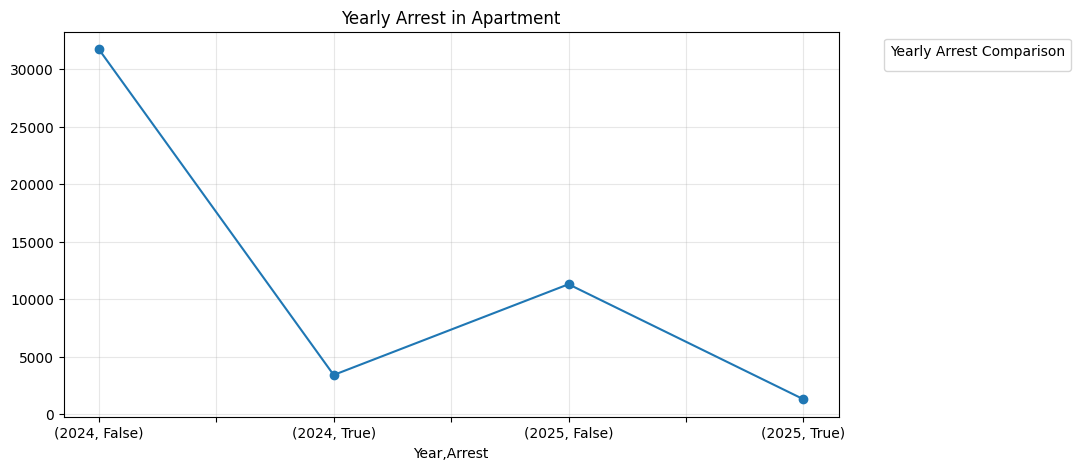

In [62]:
yearly_arrest = arrest.groupby(['Year', 'Arrest']).size()

yearly_arrest.plot(
    marker='o', 
    figsize=(10, 5),
    title='Yearly Arrest in Apartment'
)
plt.legend(title='Yearly Arrest Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h2>INSIGHT 29: In 2024, arrests in apartments were highest among non-arrested cases, while actual arrests were significantly lower.</h2>

<h2>INSIGHT 30: There was a noticeable increase in non-arrested cases in 2025 compared to 2024, showing a shift in enforcement or reporting trends.</h2>

<H2>INSIGHT 31: Arrested cases in 2025 dropped to their lowest point, suggesting fewer successful arrests or changes in policing focus within apartment-related incidents.</H2>

<h1>Q15: </h1>

In [67]:
primary = crime[crime['Location Description']== 'APARTMENT']

In [69]:
primary_df = primary[primary['Arrest']]

In [72]:
import folium
from folium.plugins import HeatMap


locations  = list(zip(primary_df['Latitude'],primary_df['Longitude']))

m = folium.Map(location=[primary_df['Latitude'].mean(), primary_df['Longitude'].mean()], zoom_start=10)

# Step 3: Add the heatmap layer
HeatMap(locations).add_to(m)

# Step 4: Save or display the map
m.save('arrest_heatmap.html')  # Save the map as an HTML file
m  # Display the map in a Jupyter Notebook

<h2>INSIGHT 32: The heatmap shows that apartment-related arrests are highly concentrated around the New City and Back of the Yards areas, indicating frequent law enforcement activity in these neighborhoods.</h2>

<h2>INSIGHT 33: Sherman Park and its surrounding blocks also display noticeable arrest density, suggesting ongoing security or policing focus in that vicinity. </h2>

<H2>INSIGHT 34: The northern and southern edges of the mapped area show fewer heat spots, implying that apartment-related incidents are less common or less reported in those zones. </H2>

<H2>INSIGHT 35: The clustering of hotspots along major roads like West 47th and West 51st Streets suggests that accessibility and traffic flow may influence where arrests are most frequent.</H2>